In [ ]:
#Easy
#1. How many unique customers are in the dataset?

#2. What are the different categories of products available? How many unique categories are there?

#3. Which payment method is the most popular? How many times was it used?

#Medium
#1. What are the three most popular categories, by total sales?

#2. What are the total sales attributed to customers over the age of 45?

#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

#Hard
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [3]:
import pandas as pd 

df = pd.read_csv("fct_invoice.csv")
df

json_df = pd.read_json("dim_customer.json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [7]:
import pandas as pd 

df = pd.read_csv("fct_invoice.csv")
df

json_df = pd.read_json("dim_customer.json")
json_df

#Easy

#1. How many unique customers are in the dataset?

unique_customers = json_df["first_name"].unique()
print(len(unique_customers))

#2. What are the different categories of products available? How many unique categories are there?

categories = df["category"].unique()
print(categories)
print(len(categories))

#3. Which payment method is the most popular? How many times was it used?

payment_methods = df["payment_method"].unique()
print(payment_methods)

credit_card = len(df.loc[df["payment_method"] == "Credit Card"])
print("Credit Card: ", credit_card)
cash = len(df.loc[df["payment_method"] == "Cash"])
print("Cash: ", cash)
debit_card = len(df.loc[df["payment_method"] == "Debit Card"])
print("Debit Card: ", debit_card)

597
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8
['Credit Card' 'Debit Card' 'Cash']
Credit Card:  34931
Cash:  44447
Debit Card:  20079


In [1]:
import pandas as pd 

df = pd.read_csv("fct_invoice.csv")
df

json_df = pd.read_json("dim_customer.json")
json_df

#Medium
#1. What are the three most popular categories, by total sales?

clothing_count = len(df.loc[df["category"] == "Clothing"])
shoes_count = len(df.loc[df["category"] == "Shoes"])
books_count = len(df.loc[df["category"] == "Books"])
cosmetics_count = len(df.loc[df["category"] == "Cosmetics"])
fandb_count = len(df.loc[df["category"] == "Food & Beverage"])
toys_count = len(df.loc[df["category"] == "Toys"])
tech_count = len(df.loc[df["category"] == "Technology"])
souv_count = len(df.loc[df["category"] == "Souvenir"])

count_dict = {
    'clothing_count' : clothing_count,
    'shoes_count' : shoes_count,
    'books_count' : books_count,
    'cosmetics_count' : cosmetics_count,
    'fandb_count' : fandb_count,
    'toys_count' : toys_count,
    'tech_count' : tech_count,
    'souv_count' : souv_count
}

top_three = sorted(count_dict.values(), reverse=True)[:3]

for name, count in count_dict.items():
    if count in top_three:
        print(name, ":", count)

#2. What are the total sales attributed to customers over the age of 45?

over_45 = len(json_df.loc[json_df["age"] > 45])
print(over_45)

clothing_count : 34487
cosmetics_count : 15097
fandb_count : 14776
1655


2021_invoice
January       9641614.62
February      8772315.22
March         9455359.38
April         9389541.54
May           9771756.97
June          9286271.35
July         10311119.68
August        9630655.70
September     9188165.62
October      10263015.06
November      9265555.29
December      9585200.16
Name: total_sales, dtype: float64
2022_invoice
January       9764311.14
February      8344111.92
March         9986685.16
April         9326144.44
May           9947574.13
June          9647503.95
July         10067602.95
August        9651705.59
September     9607629.29
October      10282075.37
November      8941584.66
December      9869885.48
Name: total_sales, dtype: float64
2023_invoice
January      9485599.83
February     9508662.96
March        2514146.79
April              0.00
May                0.00
June               0.00
July               0.00
August             0.00
September          0.00
October            0.00
November           0.00
December           0.00
Name:

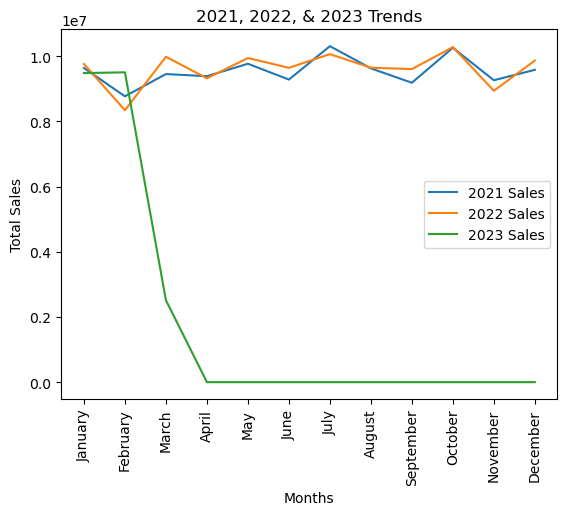

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,invoice_datetime,month_year,2021_invoice,2022_invoice,2023_invoice,total_sales
36199,I192911,971,Food & Beverage,5,26.15,Credit Card,1/1/2021,Metrocity,2021-01-01,January,January,NaN,NaN,130.75
78539,I313757,313,Clothing,4,1200.32,Credit Card,1/1/2021,Mall of Istanbul,2021-01-01,January,January,NaN,NaN,4801.28
27812,I836951,1217,Clothing,3,900.24,Cash,1/1/2021,Metrocity,2021-01-01,January,January,NaN,NaN,2700.72
27856,I159235,2425,Food & Beverage,4,20.92,Credit Card,1/1/2021,Mall of Istanbul,2021-01-01,January,January,NaN,NaN,83.68
5323,I115941,444,Clothing,1,300.08,Cash,1/1/2021,Istinye Park,2021-01-01,January,January,NaN,NaN,300.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20863,I218048,1700,Clothing,5,1500.40,Cash,8/3/2023,Mall of Istanbul,2023-03-08,March,NaN,NaN,March,7502.00
20879,I268432,379,Food & Beverage,3,15.69,Cash,8/3/2023,Kanyon,2023-03-08,March,NaN,NaN,March,47.07
61644,I200744,405,Cosmetics,5,203.30,Credit Card,8/3/2023,Kanyon,2023-03-08,March,NaN,NaN,March,1016.50
27871,I124836,2140,Shoes,3,1800.51,Credit Card,8/3/2023,Metrocity,2023-03-08,March,NaN,NaN,March,5401.53


In [22]:
#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

df = pd.read_csv("fct_invoice.csv")
df

json_df = pd.read_json("dim_customer.json")
json_df

invoice_date = df['invoice_date']
invoice_datetime = pd.to_datetime(invoice_date, format = "%d/%m/%Y")
invoice_datetime_sorted = invoice_datetime.sort_values()

df_sorted = df.loc[invoice_datetime_sorted.index]
df_sorted['invoice_datetime'] = invoice_datetime_sorted
df_sorted["month_year"] = df_sorted["invoice_datetime"].dt.strftime("%B")

month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Set the month_year column as an ordered categorical column with the custom order
df_sorted["month_year"] = pd.Categorical(df_sorted["month_year"], categories=month_order, ordered=True)

df_sorted["2021_invoice"] = df_sorted[df_sorted["invoice_datetime"].dt.year == 2021]["month_year"]
df_sorted["2022_invoice"] = df_sorted[df_sorted["invoice_datetime"].dt.year == 2022]["month_year"]
df_sorted["2023_invoice"] = df_sorted[df_sorted["invoice_datetime"].dt.year == 2023]["month_year"]
df_sorted["total_sales"] = df_sorted["price"]*df_sorted["quantity"]
total_sales = df_sorted["total_sales"]
quantity = df_sorted["quantity"]
total_2021 = df_sorted.groupby('2021_invoice')['total_sales'].sum()
total_2022 = df_sorted.groupby('2022_invoice')['total_sales'].sum()
total_2023 = df_sorted.groupby('2023_invoice')['total_sales'].sum()
df
print(total_2021)
print(total_2022)
print(total_2023)

plt.plot(total_2021.index.astype(str),total_2021.values,label = "2021 Sales")
plt.title("2021, 2022, & 2023 Trends in Sales")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(total_2022.index.astype(str),total_2022.values,label = "2022 Sales")
plt.plot(total_2023.index.astype(str),total_2023.values,label = "2023 Sales")
plt.legend()
plt.show()

df_sorted

#Essay Explanation

'''The sales trends on both 2021 and 2022 are relatively similar. January, March, May, July, Mid-September, and December all experience
an increase in sales, while the remaining months observe a decrease in sales. We could deduce that this increase in sales
are due to celebrations, holidays, and events that occur in these months, such as Christmas, the 4th of July, and Mother's Day.
However, regardless of the decrease in total sales on months like November, October, and February, we can also observe that sales
in specific categories observe an increase in these months. A few examples would be the increase of Toy Sales on November, when consumers
are likely to be purchasing Christmas presents. On the other hand, October observes an increase in Cosmetic Sales, most likely
due to the demand for Halloween makeup. Lastly, Souvenir Sales increase on months like August, where tourists are most likely
to visit malls to shop for such items. Unfortunately, the graph lacks sufficient data to observe any comparable pattern
in sales trends for the year 2023.'''

In [5]:
#Hard
#1. Create a pivot table showing the breakdown of sales across these dimensions, 
#in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

df = pd.read_csv("fct_invoice.csv")
df

json_df = pd.read_json("dim_customer.json")
json_df

#Merging toorooorooooooroooooo

merged_df = pd.merge(df[['category']],json_df[['age']],left_on=df["customer_id"],right_on=json_df["id"])
print(merged_df)

merged_df["decade_range"] = pd.cut(merged_df["age"],bins=range(0,101,10),right=False)

#Sales nanaman ambot sa imo 

merged_df['sales'] = df['quantity']*df['price']

#here we go
pivot_table = pd.pivot_table(merged_df, values = "sales", index="decade_range",columns = "category", aggfunc="sum")
display(pivot_table)

       key_0   category   age
0        229   Clothing   NaN
1        229  Cosmetics   NaN
2        229      Shoes   NaN
3        229   Clothing   NaN
4        229      Shoes   NaN
...      ...        ...   ...
99452   4973      Shoes   NaN
99453   6161      Books  36.0
99454   6779   Clothing   NaN
99455   8386   Clothing  47.0
99456   4761  Cosmetics  52.0

[99457 rows x 3 columns]


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
decade_range,,,,,,,,
"[0, 10)",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"[10, 20)",161949.11,1404928.22,606589.17,543523.10,353519.46,237447.32,211966.71,405909.95
"[20, 30)",1274631.19,7984685.34,3483129.93,3417202.99,2029004.07,1168516.96,1105749.38,2344676.88
"[30, 40)",1208995.72,8219934.23,4419360.56,3818437.74,2558655.18,1336214.61,1338687.92,2669548.89
"[40, 50)",1291224.13,8783109.79,3958321.89,3816288.42,2463866.38,1266648.71,1407393.54,2510980.55
"[50, 60)",1104812.99,7321424.77,3349614.80,3290633.51,2195758.18,1232563.16,986773.98,2166764.34
"[60, 70)",1231037.19,8082867.98,3705225.03,3454145.45,2119132.40,957045.34,1204230.92,2397438.17
"[70, 80)",830559.59,6162205.34,2165652.91,2548120.88,1745005.36,691072.63,770531.94,1772930.66
"[80, 90)",467754.66,3312635.97,1517204.77,1277718.44,1008082.66,465232.50,572145.51,962723.06


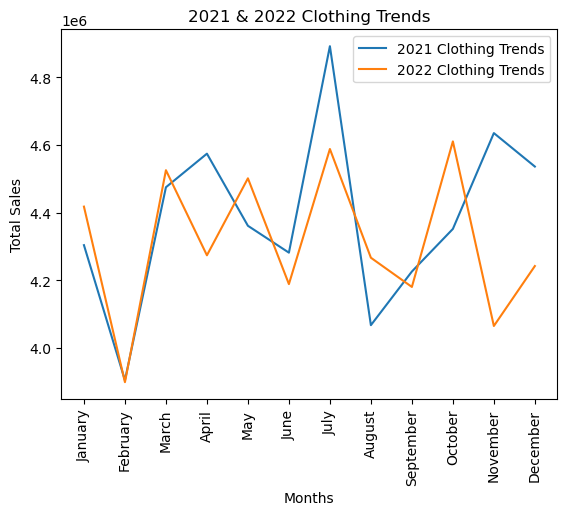

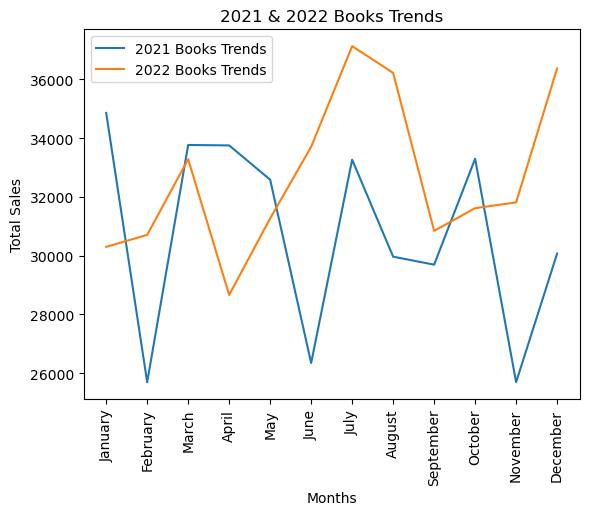

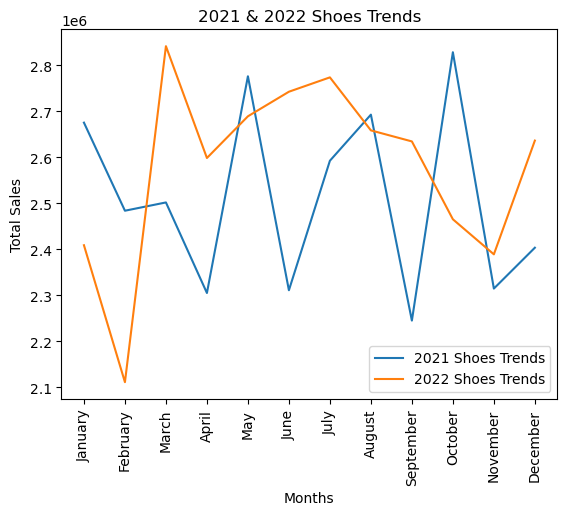

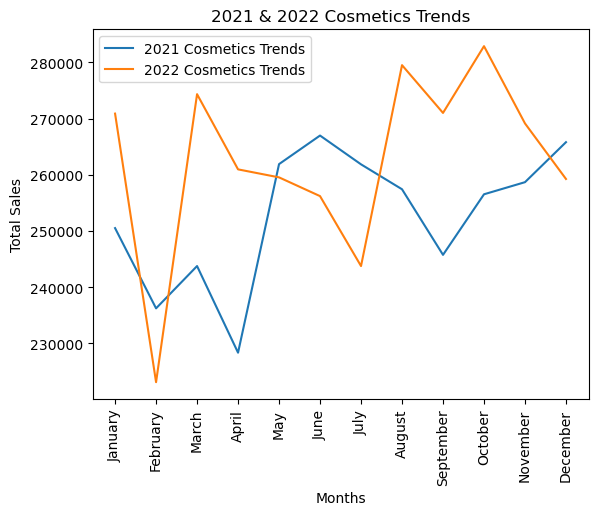

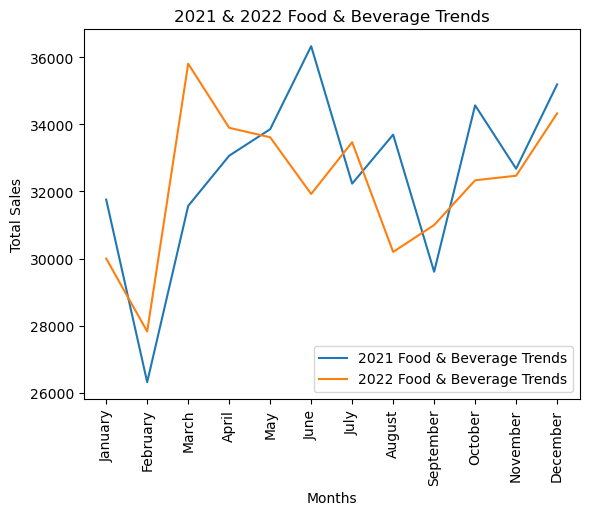

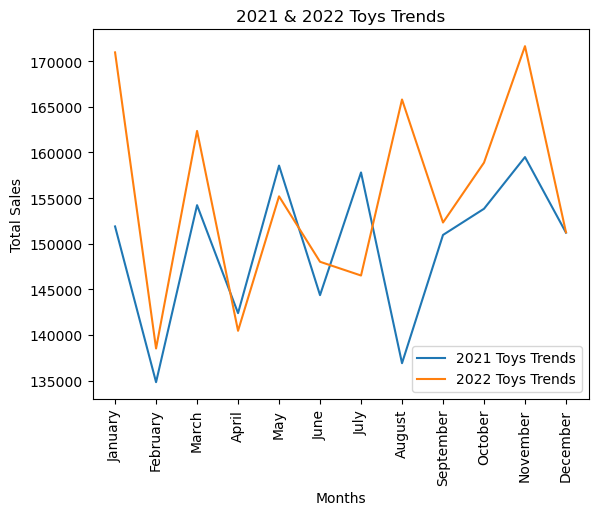

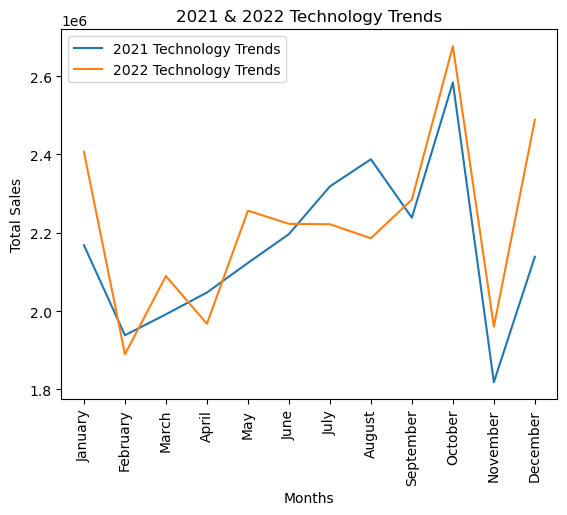

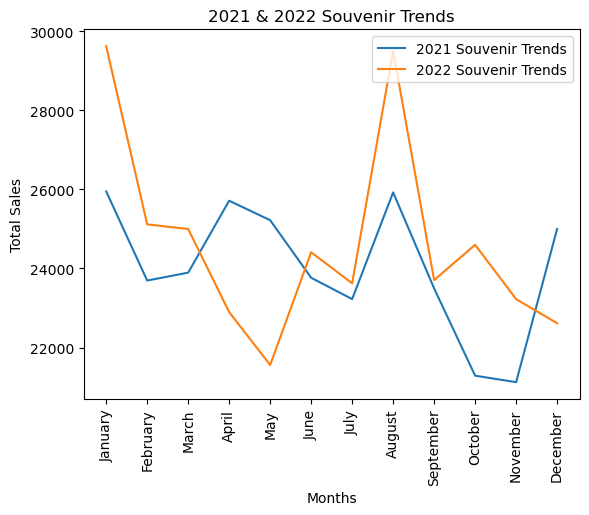

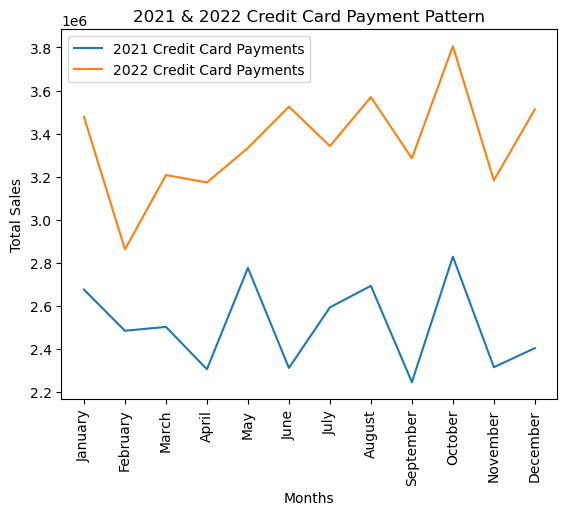

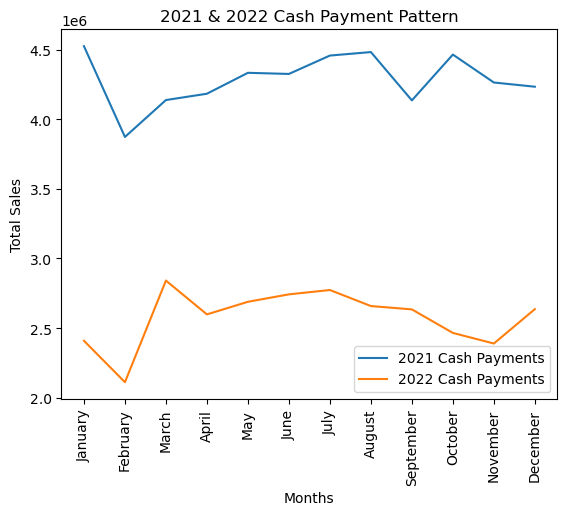

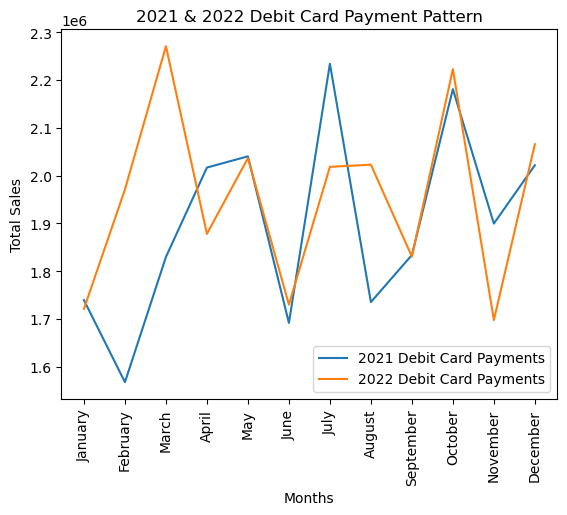

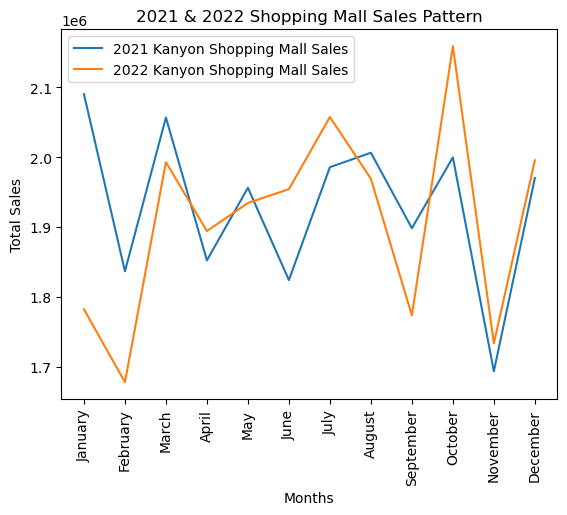

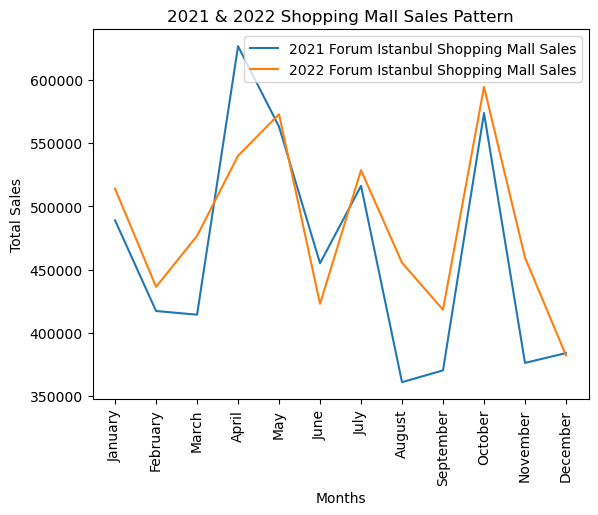

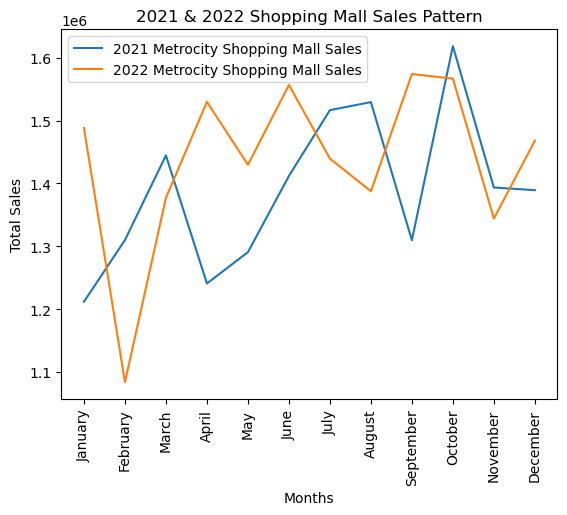

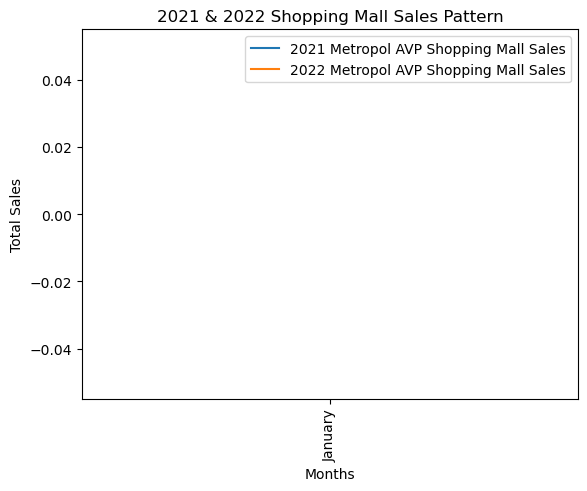

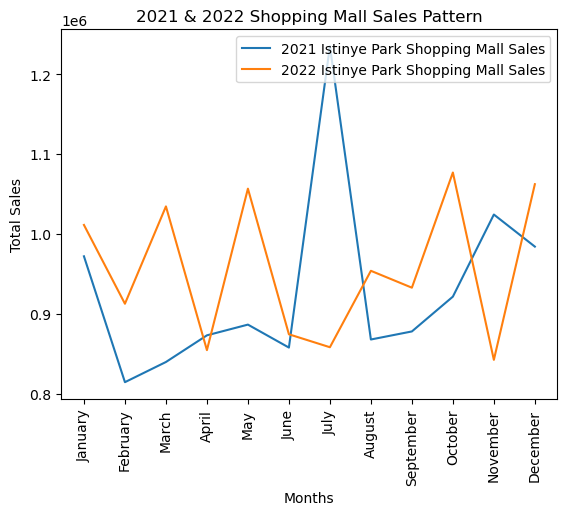

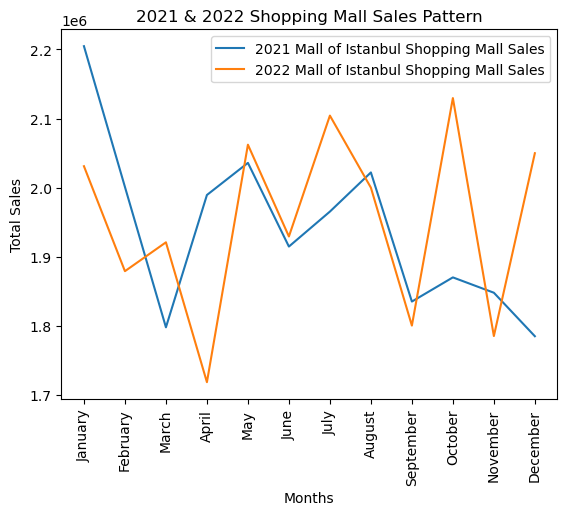

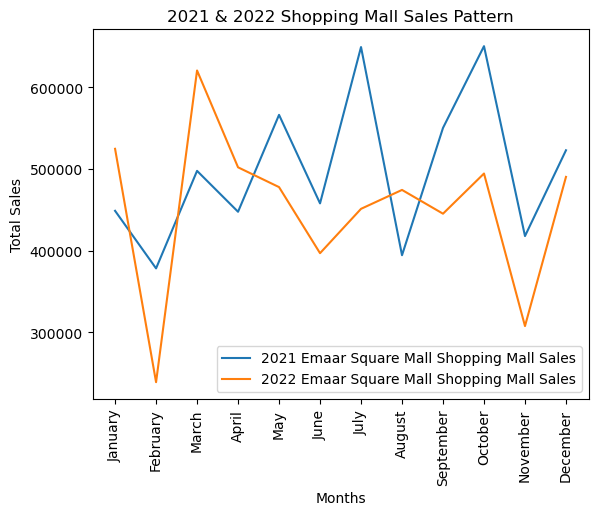

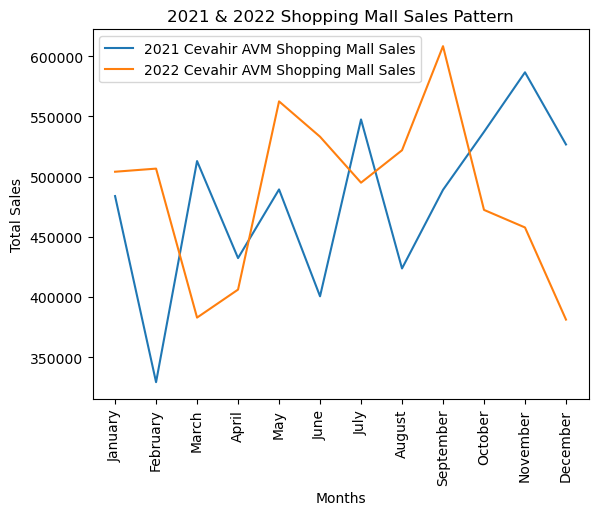

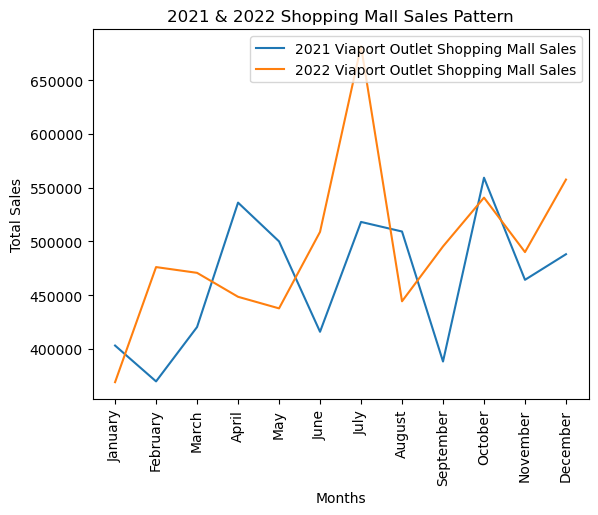

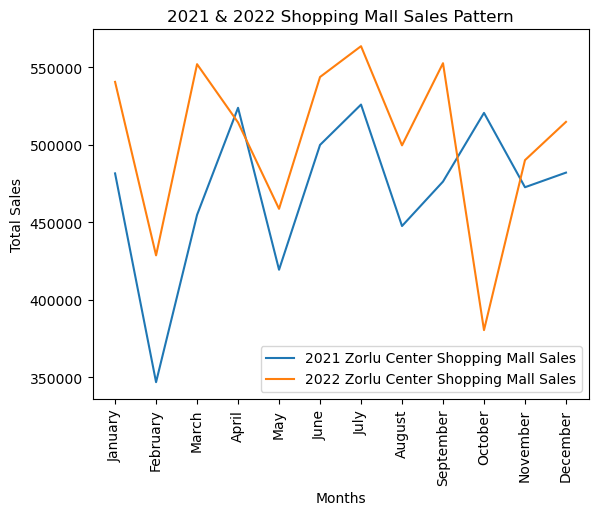

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,invoice_datetime,month_year,2021_invoice,2022_invoice,total_sales
36199,I192911,971,Food & Beverage,5,26.15,Credit Card,1/1/2021,Metrocity,2021-01-01,January,January,NaN,130.75
78539,I313757,313,Clothing,4,1200.32,Credit Card,1/1/2021,Mall of Istanbul,2021-01-01,January,January,NaN,4801.28
27812,I836951,1217,Clothing,3,900.24,Cash,1/1/2021,Metrocity,2021-01-01,January,January,NaN,2700.72
27856,I159235,2425,Food & Beverage,4,20.92,Credit Card,1/1/2021,Mall of Istanbul,2021-01-01,January,January,NaN,83.68
5323,I115941,444,Clothing,1,300.08,Cash,1/1/2021,Istinye Park,2021-01-01,January,January,NaN,300.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20863,I218048,1700,Clothing,5,1500.40,Cash,8/3/2023,Mall of Istanbul,2023-03-08,March,NaN,NaN,7502.00
20879,I268432,379,Food & Beverage,3,15.69,Cash,8/3/2023,Kanyon,2023-03-08,March,NaN,NaN,47.07
61644,I200744,405,Cosmetics,5,203.30,Credit Card,8/3/2023,Kanyon,2023-03-08,March,NaN,NaN,1016.50
27871,I124836,2140,Shoes,3,1800.51,Credit Card,8/3/2023,Metrocity,2023-03-08,March,NaN,NaN,5401.53


In [10]:
#I thought we had to do Medium #3 this way ;-; I overdid it I think HAHHA. 
# I am also very aware that this code could be shorted with the use of lists, I just did not have time to do so ;-;

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

df = pd.read_csv("fct_invoice.csv")
df

json_df = pd.read_json("dim_customer.json")
json_df

invoice_date = df['invoice_date']
invoice_datetime = pd.to_datetime(invoice_date, format = "%d/%m/%Y")
invoice_datetime_sorted = invoice_datetime.sort_values()

df_sorted = df.loc[invoice_datetime_sorted.index]
df_sorted['invoice_datetime'] = invoice_datetime_sorted
df_sorted["month_year"] = df_sorted["invoice_datetime"].dt.strftime("%B")


df_sorted["2021_invoice"] = df_sorted[df_sorted["invoice_datetime"].dt.year == 2021]["month_year"]
df_sorted["2022_invoice"] = df_sorted[df_sorted["invoice_datetime"].dt.year == 2022]["month_year"]
df_sorted["total_sales"] = df_sorted["price"]*df_sorted["quantity"]
total_sales = df_sorted["total_sales"]
invoice2021 = df_sorted["2021_invoice"]
total_2021 = df_sorted.groupby('2021_invoice')['total_sales'].sum()
total_2022 = df_sorted.groupby('2022_invoice')['total_sales'].sum()
df

#checking categories
#categories = df["category"].unique()
#print(categories)

#clothing
clothing_total_2021 = df_sorted[df_sorted["category"] == "Clothing"].groupby(['2021_invoice'])['total_sales'].sum()
clothing_total_2021 = clothing_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(clothing_total_2021)
clothing_total_2022 = df_sorted[df_sorted["category"] == "Clothing"].groupby(['2022_invoice'])['total_sales'].sum()
clothing_total_2022 = clothing_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(clothing_total_2022)

plt.plot(clothing_total_2021.index.astype(str),clothing_total_2021.values,label = "2021 Clothing Trends")
plt.title("2021 & 2022 Clothing Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(clothing_total_2022.index.astype(str),clothing_total_2022.values,label = "2022 Clothing Trends")
plt.legend()
plt.show()

#books
books_total_2021 = df_sorted[df_sorted["category"] == "Books"].groupby(['2021_invoice'])['total_sales'].sum()
books_total_2021 = books_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(books_total_2021)
books_total_2022 = df_sorted[df_sorted["category"] == "Books"].groupby(['2022_invoice'])['total_sales'].sum()
books_total_2022 = books_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(books_total_2022)

plt.plot(books_total_2021.index.astype(str),books_total_2021.values,label = "2021 Books Trends")
plt.title("2021 & 2022 Books Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(books_total_2022.index.astype(str),books_total_2022.values,label = "2022 Books Trends")
plt.legend()
plt.show()

#shoes
shoes_total_2021 = df_sorted[df_sorted["category"] == "Shoes"].groupby(['2021_invoice'])['total_sales'].sum()
shoes_total_2021 = shoes_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(shoes_total_2021)
shoes_total_2022 = df_sorted[df_sorted["category"] == "Shoes"].groupby(['2022_invoice'])['total_sales'].sum()
shoes_total_2022 = shoes_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(shoes_total_2022)

plt.plot(shoes_total_2021.index.astype(str),shoes_total_2021.values,label = "2021 Shoes Trends")
plt.title("2021 & 2022 Shoes Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(shoes_total_2022.index.astype(str),shoes_total_2022.values,label = "2022 Shoes Trends")
plt.legend()
plt.show()

#cosmetics
cosm_total_2021 = df_sorted[df_sorted["category"] == "Cosmetics"].groupby(['2021_invoice'])['total_sales'].sum()
cosm_total_2021 = cosm_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(cosm_total_2021)
cosm_total_2022 = df_sorted[df_sorted["category"] == "Cosmetics"].groupby(['2022_invoice'])['total_sales'].sum()
cosm_total_2022 = cosm_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(cosm_total_2022)

plt.plot(cosm_total_2021.index.astype(str),cosm_total_2021.values,label = "2021 Cosmetics Trends")
plt.title("2021 & 2022 Cosmetics Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(cosm_total_2022.index.astype(str),cosm_total_2022.values,label = "2022 Cosmetics Trends")
plt.legend()
plt.show()

#food & beverage
fandb_total_2021 = df_sorted[df_sorted["category"] == "Food & Beverage"].groupby(['2021_invoice'])['total_sales'].sum()
fandb_total_2021 = fandb_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(fandb_total_2021)
fandb_total_2022 = df_sorted[df_sorted["category"] == "Food & Beverage"].groupby(['2022_invoice'])['total_sales'].sum()
fandb_total_2022 = fandb_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(fandb_total_2022)

plt.plot(fandb_total_2021.index.astype(str),fandb_total_2021.values,label = "2021 Food & Beverage Trends")
plt.title("2021 & 2022 Food & Beverage Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(fandb_total_2022.index.astype(str),fandb_total_2022.values,label = "2022 Food & Beverage Trends")
plt.legend()
plt.show()

#toys
toys_total_2021 = df_sorted[df_sorted["category"] == "Toys"].groupby(['2021_invoice'])['total_sales'].sum()
toys_total_2021 = toys_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(toys_total_2021)
toys_total_2022 = df_sorted[df_sorted["category"] == "Toys"].groupby(['2022_invoice'])['total_sales'].sum()
toys_total_2022 = toys_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(toys_total_2022)

plt.plot(toys_total_2021.index.astype(str),toys_total_2021.values,label = "2021 Toys Trends")
plt.title("2021 & 2022 Toys Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(toys_total_2022.index.astype(str),toys_total_2022.values,label = "2022 Toys Trends")
plt.legend()
plt.show()

#technology
tech_total_2021 = df_sorted[df_sorted["category"] == "Technology"].groupby(['2021_invoice'])['total_sales'].sum()
tech_total_2021 = tech_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(tech_total_2021)
tech_total_2022 = df_sorted[df_sorted["category"] == "Technology"].groupby(['2022_invoice'])['total_sales'].sum()
tech_total_2022 = tech_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(tech_total_2022)

plt.plot(tech_total_2021.index.astype(str),tech_total_2021.values,label = "2021 Technology Trends")
plt.title("2021 & 2022 Technology Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(tech_total_2022.index.astype(str),tech_total_2022.values,label = "2022 Technology Trends")
plt.legend()
plt.show()

#souvenir
souv_total_2021 = df_sorted[df_sorted["category"] == "Souvenir"].groupby(['2021_invoice'])['total_sales'].sum()
souv_total_2021 = souv_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(souv_total_2021)
souv_total_2022 = df_sorted[df_sorted["category"] == "Souvenir"].groupby(['2022_invoice'])['total_sales'].sum()
souv_total_2022 = souv_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(souv_total_2022)

plt.plot(souv_total_2021.index.astype(str),souv_total_2021.values,label = "2021 Souvenir Trends")
plt.title("2021 & 2022 Souvenir Trends")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(souv_total_2022.index.astype(str),souv_total_2022.values,label = "2022 Souvenir Trends")
plt.legend()
plt.show()

#PAYMENTS 

#credit card
cc_total_2021 = df_sorted[df_sorted["payment_method"] == "Credit Card"].groupby(['2021_invoice'])['total_sales'].sum()
cc_total_2021 = cc_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(cc_total_2021)
cc_total_2022 = df_sorted[df_sorted["payment_method"] == "Credit Card"].groupby(['2022_invoice'])['total_sales'].sum()
cc_total_2022 = cc_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(cc_total_2022)

plt.plot(shoes_total_2021.index.astype(str),shoes_total_2021.values,label = "2021 Credit Card Payments")
plt.title("2021 & 2022 Credit Card Payment Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(cc_total_2022.index.astype(str),cc_total_2022.values,label = "2022 Credit Card Payments")
plt.legend()
plt.show()

#cash
c_total_2021 = df_sorted[df_sorted["payment_method"] == "Cash"].groupby(['2021_invoice'])['total_sales'].sum()
c_total_2021 = c_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(c_total_2021)
c_total_2022 = df_sorted[df_sorted["payment_method"] == "Cash"].groupby(['2022_invoice'])['total_sales'].sum()
c_total_2022 = c_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(c_total_2022)

plt.plot(c_total_2021.index.astype(str),c_total_2021.values,label = "2021 Cash Payments")
plt.title("2021 & 2022 Cash Payment Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(shoes_total_2022.index.astype(str),shoes_total_2022.values,label = "2022 Cash Payments")
plt.legend()
plt.show()

#cash
dc_total_2021 = df_sorted[df_sorted["payment_method"] == "Debit Card"].groupby(['2021_invoice'])['total_sales'].sum()
dc_total_2021 = dc_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(dc_total_2021)
dc_total_2022 = df_sorted[df_sorted["payment_method"] == "Debit Card"].groupby(['2022_invoice'])['total_sales'].sum()
dc_total_2022 = dc_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(dc_total_2022)

plt.plot(dc_total_2021.index.astype(str),dc_total_2021.values,label = "2021 Debit Card Payments")
plt.title("2021 & 2022 Debit Card Payment Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(dc_total_2022.index.astype(str),dc_total_2022.values,label = "2022 Debit Card Payments")
plt.legend()
plt.show()

#SHOPPING MALLS

#kanyon
kanyon_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Kanyon"].groupby(['2021_invoice'])['total_sales'].sum()
kanyon_total_2021 = kanyon_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(kanyon_total_2021)
kanyon_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Kanyon"].groupby(['2022_invoice'])['total_sales'].sum()
kanyon_total_2022 = kanyon_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(kanyon_total_2022)

plt.plot(kanyon_total_2021.index.astype(str),kanyon_total_2021.values,label = "2021 Kanyon Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(kanyon_total_2022.index.astype(str),kanyon_total_2022.values,label = "2022 Kanyon Shopping Mall Sales")
plt.legend()
plt.show()

#forum_istanbul
forum_istanbul_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Forum Istanbul"].groupby(['2021_invoice'])['total_sales'].sum()
forum_istanbul_total_2021 = forum_istanbul_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(forum_istanbul_total_2021)
forum_istanbul_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Forum Istanbul"].groupby(['2022_invoice'])['total_sales'].sum()
forum_istanbul_total_2022 = forum_istanbul_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(forum_istanbul_total_2022)

plt.plot(forum_istanbul_total_2021.index.astype(str),forum_istanbul_total_2021.values,label = "2021 Forum Istanbul Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(forum_istanbul_total_2022.index.astype(str),forum_istanbul_total_2022.values,label = "2022 Forum Istanbul Shopping Mall Sales")
plt.legend()
plt.show()

#metrocity
metrocity_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Metrocity"].groupby(['2021_invoice'])['total_sales'].sum()
metrocity_total_2021 = metrocity_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(metrocity_total_2021)
metrocity_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Metrocity"].groupby(['2022_invoice'])['total_sales'].sum()
metrocity_total_2022 = metrocity_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(metrocity_total_2022)

plt.plot(metrocity_total_2021.index.astype(str),metrocity_total_2021.values,label = "2021 Metrocity Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(metrocity_total_2022.index.astype(str),metrocity_total_2022.values,label = "2022 Metrocity Shopping Mall Sales")
plt.legend()
plt.show()

#metropol_avp
metropol_avp_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Metropol AVP"].groupby(['2021_invoice'])['total_sales'].sum()
metropol_avp_total_2021 = metropol_avp_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(metropol_avp_total_2021)
metropol_avp_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Metropol AVP"].groupby(['2022_invoice'])['total_sales'].sum()
metropol_avp_total_2022 = metropol_avp_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(metropol_avp_total_2022)

plt.plot(metropol_avp_total_2021.index.astype(str),metropol_avp_total_2021.values,label = "2021 Metropol AVP Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(metropol_avp_total_2022.index.astype(str),metropol_avp_total_2022.values,label = "2022 Metropol AVP Shopping Mall Sales")
plt.legend()
plt.show()

#istinye_park
istinye_park_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Istinye Park"].groupby(['2021_invoice'])['total_sales'].sum()
istinye_park_total_2021 = istinye_park_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(istinye_park_total_2021)
istinye_park_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Istinye Park"].groupby(['2022_invoice'])['total_sales'].sum()
istinye_park_total_2022 = istinye_park_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(istinye_park_total_2022)

plt.plot(istinye_park_total_2021.index.astype(str),istinye_park_total_2021.values,label = "2021 Istinye Park Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(istinye_park_total_2022.index.astype(str),istinye_park_total_2022.values,label = "2022 Istinye Park Shopping Mall Sales")
plt.legend()
plt.show()

#mall_of_istanbul
mall_of_istanbul_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Mall of Istanbul"].groupby(['2021_invoice'])['total_sales'].sum()
mall_of_istanbul_total_2021 = mall_of_istanbul_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(mall_of_istanbul_total_2021)
mall_of_istanbul_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Mall of Istanbul"].groupby(['2022_invoice'])['total_sales'].sum()
mall_of_istanbul_total_2022 = mall_of_istanbul_total_2022.reindex(df_sorted["2022_invoice"].unique())
#print(mall_of_istanbul_total_2022)

plt.plot(mall_of_istanbul_total_2021.index.astype(str),mall_of_istanbul_total_2021.values,label = "2021 Mall of Istanbul Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(mall_of_istanbul_total_2022.index.astype(str),mall_of_istanbul_total_2022.values,label = "2022 Mall of Istanbul Shopping Mall Sales")
plt.legend()
plt.show()

#emaar_square_mall
emaar_square_mall_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Emaar Square Mall"].groupby(['2021_invoice'])['total_sales'].sum()
emaar_square_mall_total_2021 = emaar_square_mall_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(emaar_square_mall_total_2021)
emaar_square_mall_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Emaar Square Mall"].groupby(['2022_invoice'])['total_sales'].sum()
emaar_square_mall_total_2022 = emaar_square_mall_total_2022.reindex(df_sorted["2022_invoice"].unique())
#printe(maar_square_mall_total_2022)

plt.plot(emaar_square_mall_total_2021.index.astype(str),emaar_square_mall_total_2021.values,label = "2021 Emaar Square Mall Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(emaar_square_mall_total_2022.index.astype(str),emaar_square_mall_total_2022.values,label = "2022 Emaar Square Mall Shopping Mall Sales")
plt.legend()
plt.show()

#cevahir_avm
cevahir_avm_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Cevahir AVM"].groupby(['2021_invoice'])['total_sales'].sum()
cevahir_avm_total_2021 = cevahir_avm_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(cevahir_avm_total_2021)
cevahir_avm_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Cevahir AVM"].groupby(['2022_invoice'])['total_sales'].sum()
cevahir_avm_total_2022 = cevahir_avm_total_2022.reindex(df_sorted["2022_invoice"].unique())
#printe(cevahir_avm_total_2022)

plt.plot(cevahir_avm_total_2021.index.astype(str),cevahir_avm_total_2021.values,label = "2021 Cevahir AVM Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(cevahir_avm_total_2022.index.astype(str),cevahir_avm_total_2022.values,label = "2022 Cevahir AVM Shopping Mall Sales")
plt.legend()
plt.show()

#viaport_outlet
viaport_outlet_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Viaport Outlet"].groupby(['2021_invoice'])['total_sales'].sum()
viaport_outlet_total_2021 = viaport_outlet_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(viaport_outlet_total_2021)
viaport_outlet_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Viaport Outlet"].groupby(['2022_invoice'])['total_sales'].sum()
viaport_outlet_total_2022 = viaport_outlet_total_2022.reindex(df_sorted["2022_invoice"].unique())
#printe(viaport_outlet_total_2022)

plt.plot(viaport_outlet_total_2021.index.astype(str),viaport_outlet_total_2021.values,label = "2021 Viaport Outlet Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(viaport_outlet_total_2022.index.astype(str),viaport_outlet_total_2022.values,label = "2022 Viaport Outlet Shopping Mall Sales")
plt.legend()
plt.show()
                                      
#zorlu_center
zorlu_center_total_2021 = df_sorted[df_sorted["shopping_mall"] == "Zorlu Center"].groupby(['2021_invoice'])['total_sales'].sum()
zorlu_center_total_2021 = zorlu_center_total_2021.reindex(df_sorted["2021_invoice"].unique()) 
#print(zorlu_center_total_2021)
zorlu_center_total_2022 = df_sorted[df_sorted["shopping_mall"] == "Zorlu Center"].groupby(['2022_invoice'])['total_sales'].sum()
zorlu_center_total_2022 = zorlu_center_total_2022.reindex(df_sorted["2022_invoice"].unique())
#printe(zorlu_center_total_2022)

plt.plot(zorlu_center_total_2021.index.astype(str),zorlu_center_total_2021.values,label = "2021 Zorlu Center Shopping Mall Sales")
plt.title("2021 & 2022 Shopping Mall Sales Pattern")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.plot(viaport_outlet_total_2022.index.astype(str),zorlu_center_total_2022.values,label = "2022 Zorlu Center Shopping Mall Sales")
plt.legend()
plt.show()

df_sorted

In [ ]:
#SQL Dump

'C:/Users/Daryll Marion/Downloads/ITMGT Activities/sales_sql_dump.sql'